In [1]:
from google.colab import files

# Upload file ZIP dari komputer lokal
uploaded = files.upload()

Saving Data.zip to Data.zip


In [42]:
from google.colab import files

# Upload file ZIP dari komputer lokal
uploaded = files.upload()

Saving A.png to A.png


In [2]:
import zipfile
import os

# Ekstraksi file zip
with zipfile.ZipFile("Data.zip", 'r') as zip_ref:
    zip_ref.extractall("data")  # Akan diekstrak ke folder bernama 'data'

In [3]:
# Cek isi folder
print("Isi folder data:")
print(os.listdir("data"))

Isi folder data:
['train.csv', 'test.csv']


In [8]:
print(train_df.columns)

Index(['45', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.524', '0.525', '0.526', '0.527', '0.528', '0.529', '0.530', '0.531',
       '0.532', '0.533'],
      dtype='object', length=785)


In [10]:
import pandas as pd
import tensorflow.keras as keras

# Baca CSV tanpa header
train_df = pd.read_csv("data/train.csv", header=None)
test_df = pd.read_csv("data/test.csv", header=None)

# Kolom pertama adalah label
y_train = train_df[0]
y_valid = test_df[0]

# Hapus kolom label dari data fitur
x_train = train_df.drop(0, axis=1)
x_valid = test_df.drop(0, axis=1)

# Ubah label ke kategori one-hot
num_classes = len(y_train.unique())
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalisasi dan reshape input
x_train = x_train / 255.0
x_valid = x_valid / 255.0

x_train = x_train.values.reshape(-1, 28, 28, 1)
x_valid = x_valid.values.reshape(-1, 28, 28, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu",
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)

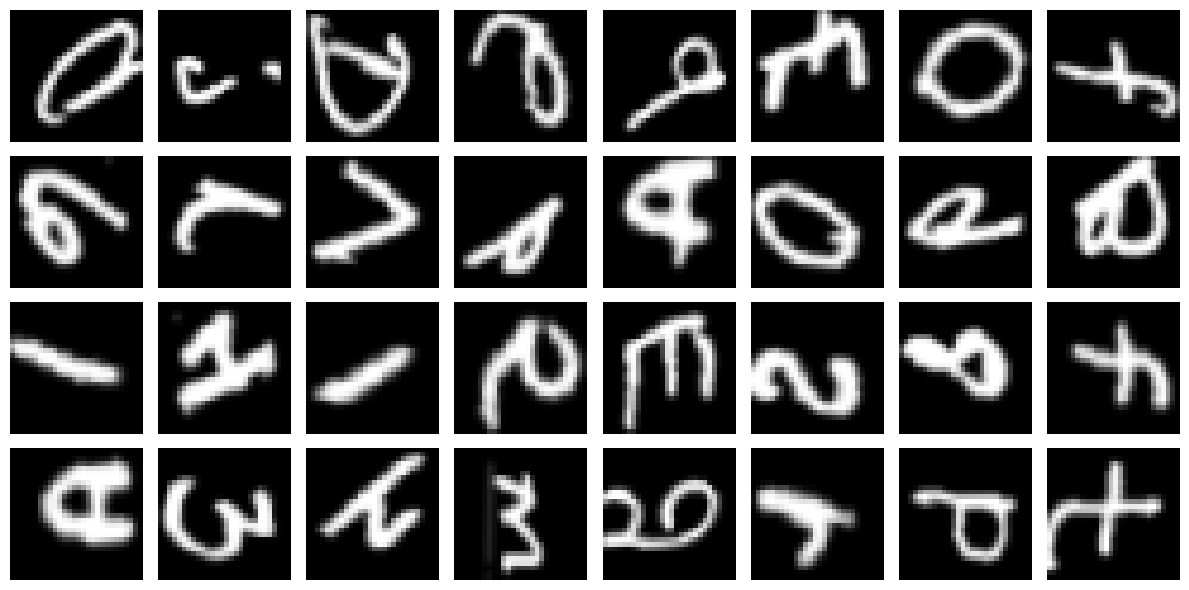

In [14]:
import matplotlib.pyplot as plt
import numpy as np

batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

# Gunakan fungsi next() bawaan Python
x, y = next(img_iter)

fig, ax = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image), cmap='gray')
    ax.flatten()[i].axis('off')
plt.tight_layout()
plt.show()


In [15]:
datagen.fit(x_train)

In [16]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(
    img_iter,
    epochs=10,
    steps_per_epoch=len(x_train) // batch_size,
    validation_data=(x_valid, y_valid)
)

Epoch 1/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 464s 132ms/step - accuracy: 0.6993 - loss: 0.9358 - val_accuracy: 0.8073 - val_loss: 0.5784
Epoch 2/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 537s 142ms/step - accuracy: 0.7652 - loss: 0.7219 - val_accuracy: 0.8247 - val_loss: 0.5368
Epoch 3/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 529s 149ms/step - accuracy: 0.7849 - loss: 0.6482 - val_accuracy: 0.7947 - val_loss: 0.6325
Epoch 4/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 484s 127ms/step - accuracy: 0.7979 - loss: 0.6057 - val_accuracy: 0.8132 - val_loss: 0.5622
Epoch 5/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 509s 129ms/step - accuracy: 0.8039 - loss: 0.5838 - val_accuracy: 0.8319 - val_loss: 0.4975
Epoch 6/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 452s 128ms/step - accuracy: 0.8129 - loss: 0.5574 - val_accuracy: 0.8215 - val_loss: 0.5537
Epoch 7/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 504s 129ms/step - accuracy: 0.8169 - loss: 0.5406 - val_accuracy: 0.8455 - val_loss: 0.4489
Epoch 8/10
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 450s 128ms/step - ac

In [22]:
model.save("model_gesture.h5")
print("Model berhasil disimpan sebagai model_gesture.h5")

Model berhasil disimpan sebagai model_gesture.h5


In [23]:
from tensorflow import keras

model = keras.models.load_model('model_gesture.h5')

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 75)     │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 75)     │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 50)     │        33,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 25)       │        11,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 25)       │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 25)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 47)             │        24,111 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,850 (1.05 MB)

 Trainable params: 275,548 (1.05 MB)

 Non-trainable params: 300 (1.17 KB)

 Optimizer params: 2 (12.00 B)

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

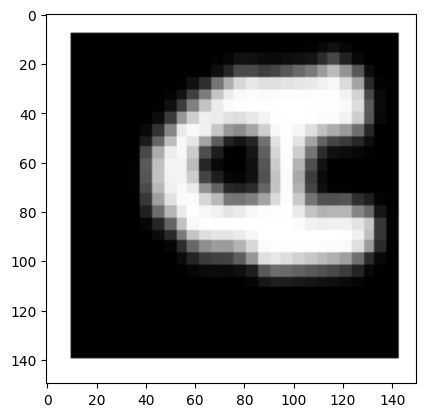

In [71]:
show_image('A.png')

In [72]:
from tensorflow.keras.preprocessing import image as image_utils

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    return image

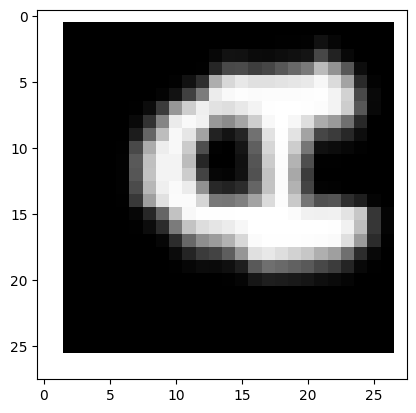

In [73]:
image = load_and_scale_image('A.png')
plt.imshow(image, cmap='gray')

In [74]:
image = image_utils.img_to_array(image)

In [75]:
# This reshape corresponds to 1 image of 28x28 pixels with one color channel
image = image.reshape(1,28,28,1)

In [76]:
image = image / 255

In [77]:
prediction = model.predict(image)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[4.2469916e-11 3.7447720e-10 6.5203312e-12 7.1804784e-09 1.0467723e-15
  1.2298927e-10 3.7381619e-11 6.6554733e-14 1.8379577e-13 1.2902377e-13
  3.4811154e-07 1.3244845e-03 7.0130424e-10 4.0941773e-06 3.8270391e-06
  1.5462822e-12 1.1354729e-06 4.5524944e-06 4.5912572e-09 2.1765282e-11
  7.4513715e-11 2.6892418e-12 9.2529640e-02 6.3881898e-06 2.8560292e-12
  6.0956873e-10 1.1346736e-03 3.9933248e-08 6.2356334e-15 3.9712591e-12
  1.0486184e-08 2.6625677e-13 9.0499061e-01 1.7028387e-12 5.1394770e-15
  1.9088169e-09 5.2111169e-09 8.1291290e-10 6.9638382e-08 8.3393842e-10
  5.0776294e-13 8.8360103e-10 3.8990261e-12 1.3219856e-11 1.1875634e-11
  1.8447050e-16 8.3498634e-16]]


In [78]:
import numpy as np
np.argmax(prediction)

np.int64(32)

In [90]:
# Alphabet does not contain j or z because they require movement
alphabet = "abcdefghiklmnopqrstuvwxy0123456789"
dictionary = {}
for i in range(33):
    dictionary[i] = alphabet[i]
dictionary

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'k',
 10: 'l',
 11: 'm',
 12: 'n',
 13: 'o',
 14: 'p',
 15: 'q',
 16: 'r',
 17: 's',
 18: 't',
 19: 'u',
 20: 'v',
 21: 'w',
 22: 'x',
 23: 'y',
 24: '0',
 25: '1',
 26: '2',
 27: '3',
 28: '4',
 29: '5',
 30: '6',
 31: '7',
 32: '8'}

In [86]:
dictionary[np.argmax(prediction)]

'8'

In [87]:
print("Keys in dictionary:", dictionary.keys())
print("Predicted label index:", np.argmax(prediction))

Keys in dictionary: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])
Predicted label index: 32


In [88]:
def predict_letter(file_path):
    show_image(file_path)
    image = load_and_scale_image(file_path)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,28,28,1)
    image = image/255
    prediction = model.predict(image)
    # convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    return predicted_letter

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


'8'

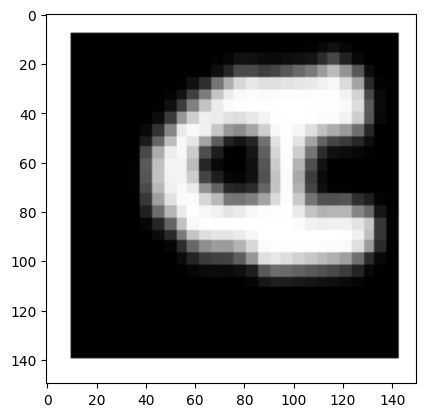

In [89]:
predict_letter("A.png")

In [91]:
from google.colab import files

# Upload file ZIP dari komputer lokal
uploaded = files.upload()

Saving 3.png to 3.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


'd'

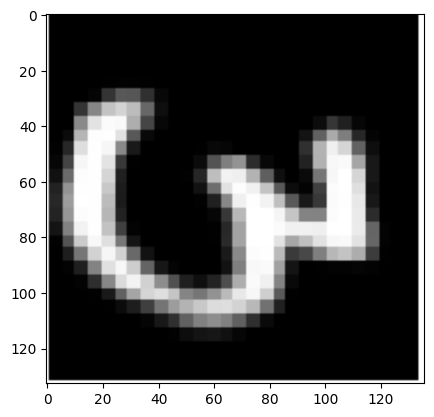

In [92]:
predict_letter("3.png")